<a href="https://colab.research.google.com/github/rishabh7302/Machine-learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [56]:
## import some basic libararies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
## divide the dataset into independent and dependent features

x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [59]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [60]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [61]:
## featuring enginerring part
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)
geography=geography.astype(int)
gender=gender.astype(int)

In [62]:
## concatenate  these variables with the dataframe
x=x.drop(['Geography','Gender'],axis=1)



In [63]:
x=pd.concat([x,geography,gender],axis=1)

In [64]:
#splitting the dataset into traing set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [65]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [66]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [67]:
x_test


array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [68]:
x_train.shape

(8000, 11)

In [69]:
## part 2 Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [70]:
## Lets initialize the ANN
classifier=Sequential()

In [71]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))



In [72]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [73]:
# adding the 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [74]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [75]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
# Since adam optimizers use a deafult learing rate of 0.01 but if you want your own learning rate then write below code
# import tensorflow
# opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [77]:
## Early stopping concept
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [78]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7528 - loss: 0.6083 - val_accuracy: 0.7955 - val_loss: 0.4672
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7877 - loss: 0.4745 - val_accuracy: 0.7978 - val_loss: 0.4346
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8011 - loss: 0.4441 - val_accuracy: 0.8201 - val_loss: 0.4207
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8200 - loss: 0.4106 - val_accuracy: 0.8273 - val_loss: 0.4103
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8217 - loss: 0.4174 - val_accuracy: 0.8273 - val_loss: 0.4034
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8320 - loss: 0.3800 - val_accuracy: 0.8296 - val_loss: 0.3901
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8299 - loss: 0.3852 - val_accuracy: 0.8398 - val_loss: 0.3818
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8414 - loss: 0.3711 - 

In [79]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

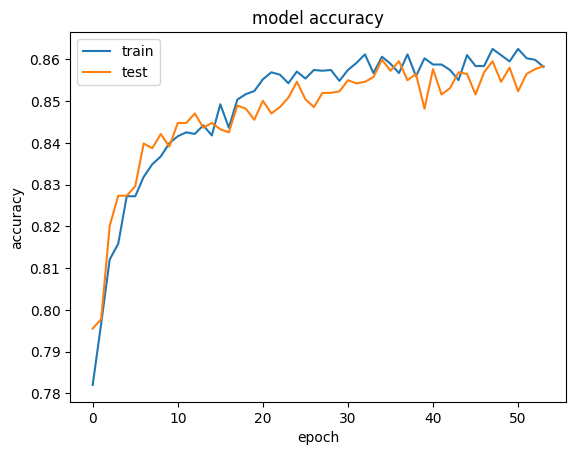

In [80]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

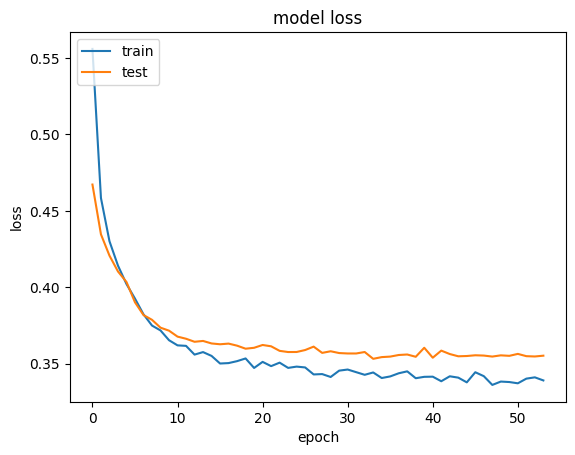

In [81]:
## for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
# part 3 making prediction and evaluating the model
#predicting the test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [83]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1489,  106],
       [ 191,  214]])

In [84]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8515

In [85]:
## get the weights
classifier.get_weights()

[array([[-0.02571388, -0.05676762,  0.1163662 , -0.27120134, -0.32072294,
          0.2076663 ,  0.03251191,  0.33621877, -0.05667751, -0.0607538 ,
          0.00683314],
        [ 0.90937537,  0.2563539 ,  0.00134746, -0.12139618, -1.0395113 ,
          0.5985333 , -0.5531141 , -0.03936303,  0.02999533, -0.8102661 ,
          0.49527252],
        [-0.06295743, -0.08092619,  0.02970782, -0.08665385, -0.06729149,
          0.54942644,  0.03278782,  0.09323065, -0.16717312, -0.1016475 ,
          0.03424295],
        [-0.30625987,  0.19277132,  0.3208528 ,  0.13730791,  0.30443412,
         -0.19266285, -0.3156401 , -0.43804303, -0.8098541 , -0.41547295,
         -0.29467592],
        [-0.2738527 ,  1.1220685 , -0.02997833, -1.0084727 , -0.35912558,
         -0.9274533 , -0.27714926, -0.1230876 , -1.1520306 ,  0.13914889,
         -0.26839197],
        [-0.08277892, -0.09875235, -0.06943224, -0.1687336 ,  0.01446706,
          0.00864531, -0.18821286, -0.11509974, -0.04683731, -0.1439959